# Assignment 14 : Decision Tree (Company_data.csv)
# -------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# Import Dataset
company_d = pd.read_csv('Company_Data.csv')
company_d

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
 company_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
company_d.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [21]:
#Label Encoding

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# encode variables with ordinal encoding
company_d1['ShelveLoc'] = label_encoder.fit_transform(company_d['ShelveLoc'])
company_d1['Urban'] = label_encoder.fit_transform(company_d['Urban'])
company_d1['US'] = label_encoder.fit_transform(company_d['US'])

In [22]:
company_d1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,0
396,6.14,139,23,3,37,120,2,55,11,0,1,1
397,7.41,162,26,12,368,159,2,40,18,1,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1,1


In [23]:
company_d['Sales'].mean()

7.496325

In [24]:
sales_val = []
for value in company_d["Sales"]:
    if value<=7.49:
        sales_val.append("low")
    else:
        sales_val.append("high")
        
company_d1["sales_val"]= sales_val

In [25]:
company_d1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,9.50,138,73,11,276,120,0,42,17,1,1,high
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,high
3,7.40,117,100,4,466,97,2,55,14,1,1,low
4,4.15,141,64,3,340,128,0,38,13,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,high
396,6.14,139,23,3,37,120,2,55,11,0,1,low
397,7.41,162,26,12,368,159,2,40,18,1,1,low
398,5.94,100,79,7,284,95,0,50,12,1,1,low


In [36]:

#Label Encoding
#low=0 and high=1
company_d1["sales_val"] = label_encoder.fit_transform(company_d1["sales_val"])
company_d1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,0
396,6.14,139,23,3,37,120,2,55,11,0,1,1
397,7.41,162,26,12,368,159,2,40,18,1,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1,1


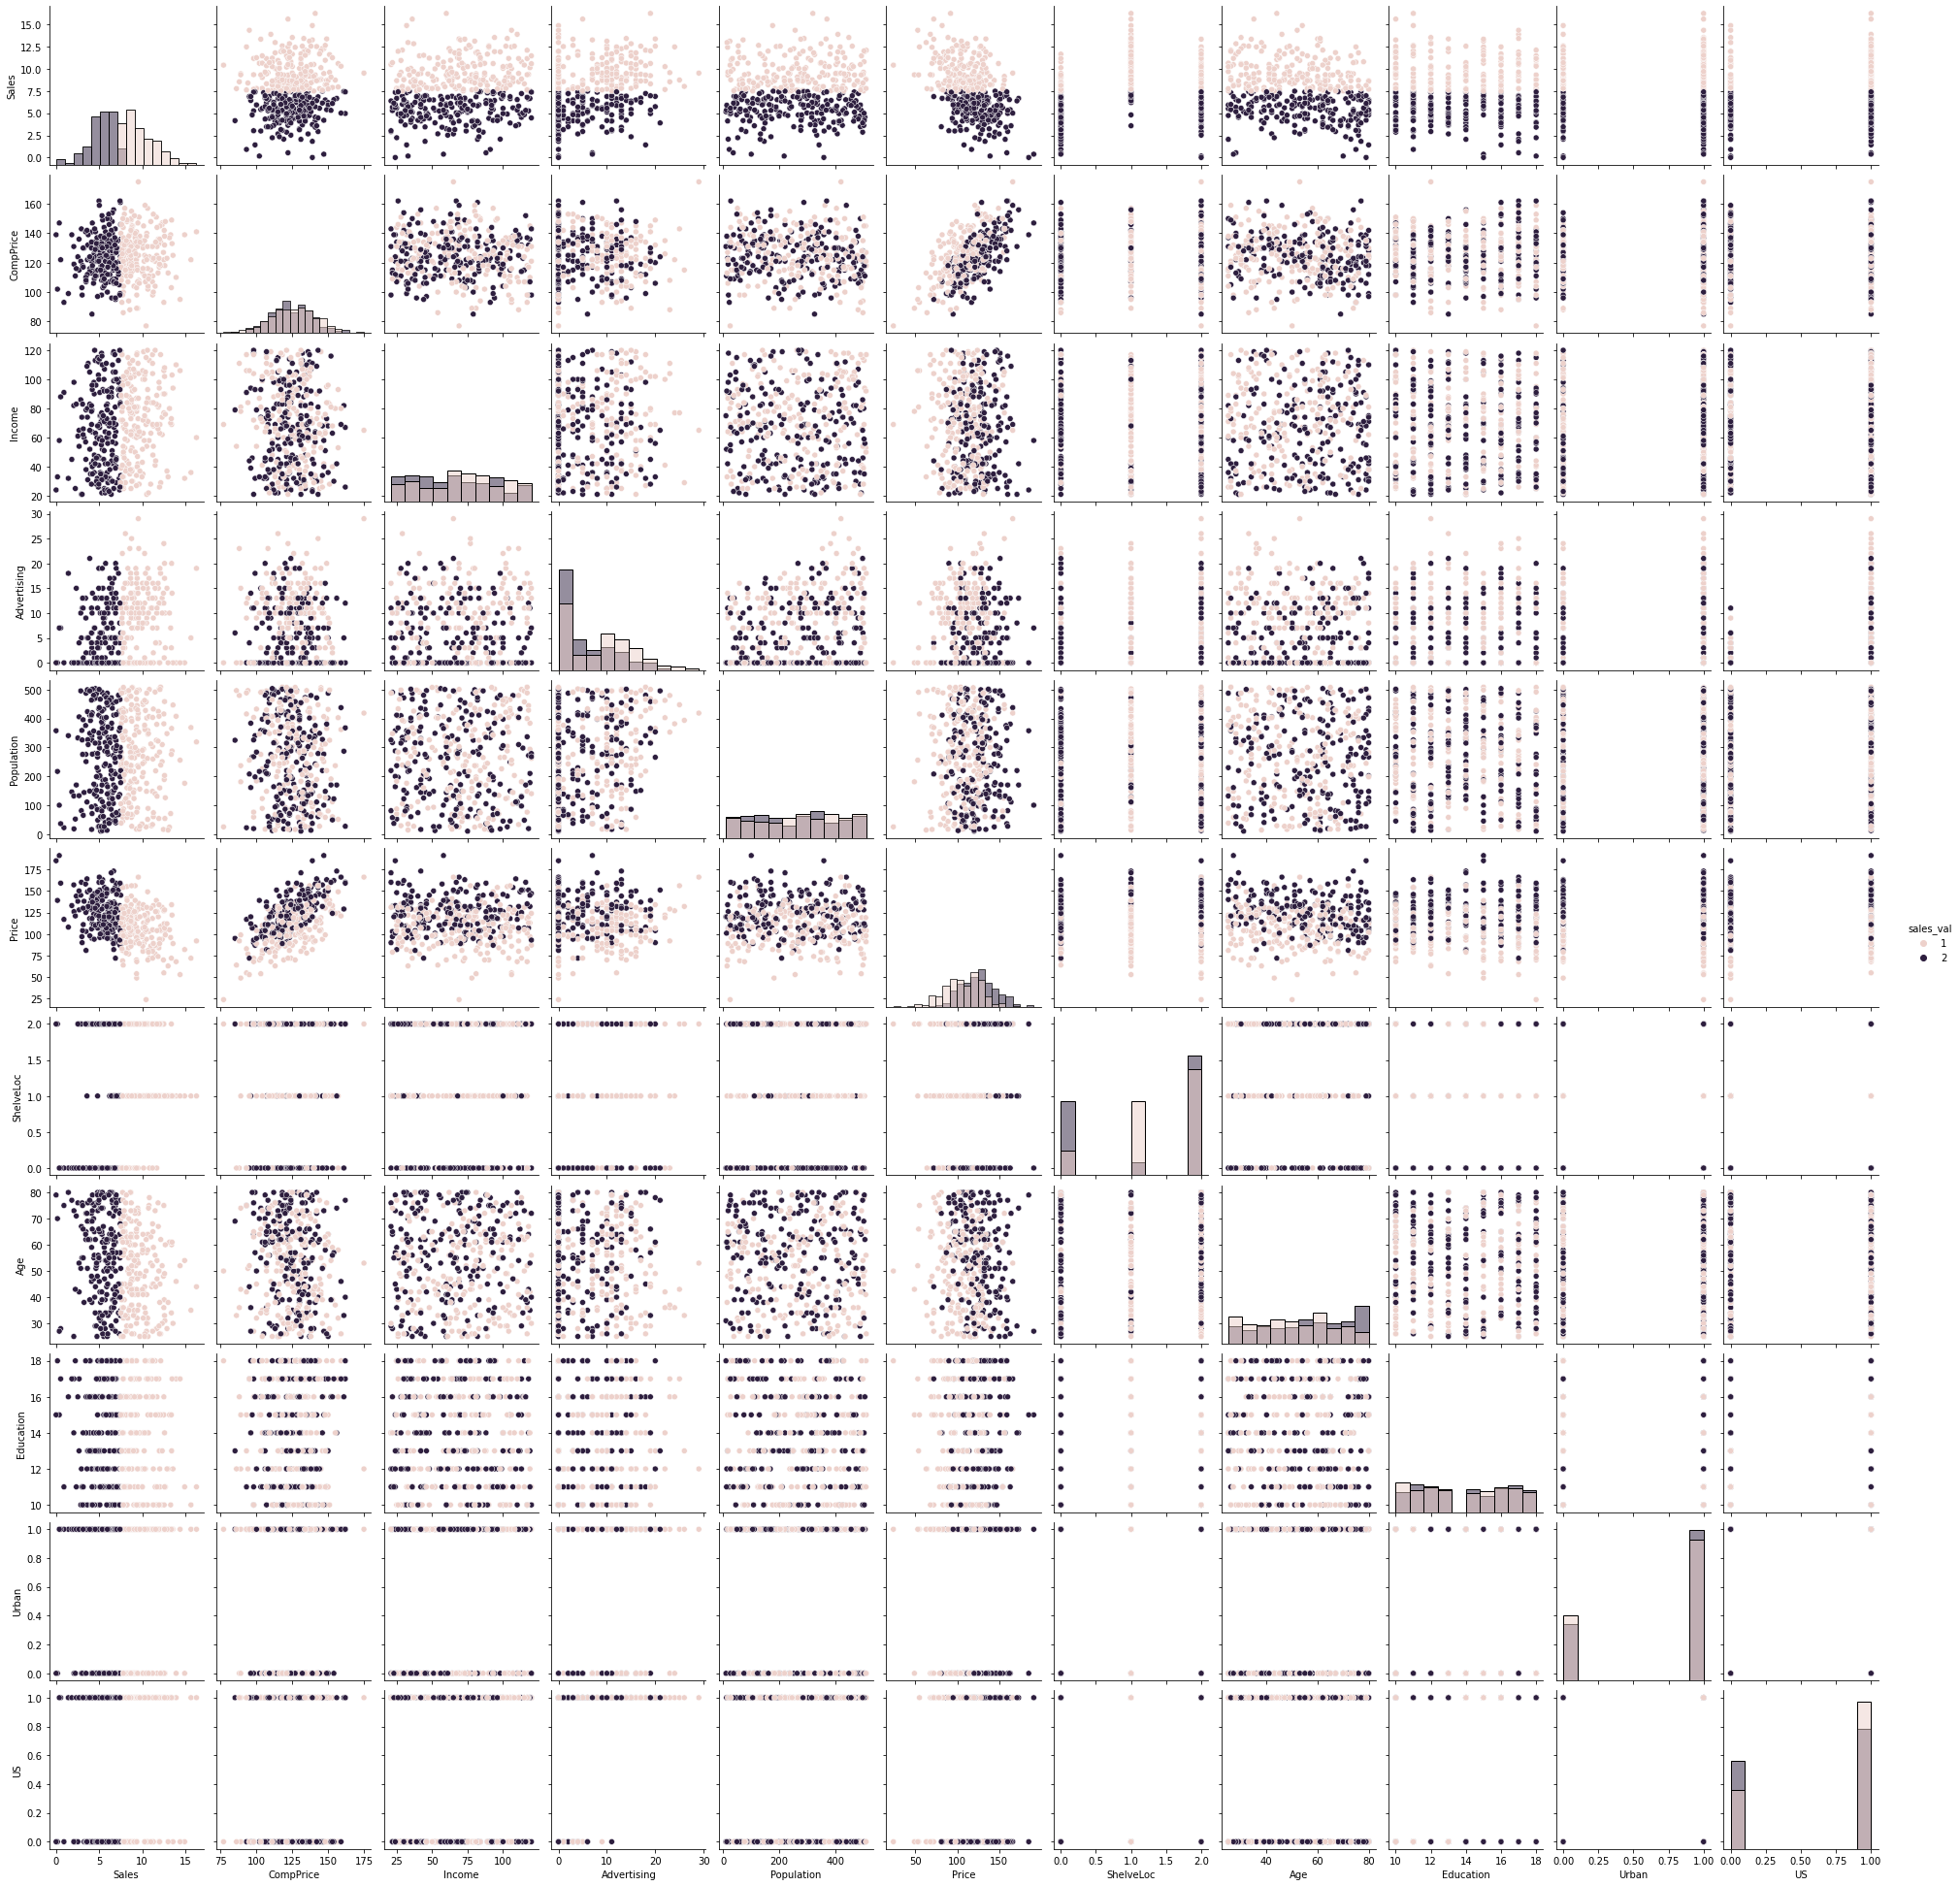

In [70]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=company_d1, hue = 'sales_val',diag_kind="hist")

In [37]:
x = company_d1.drop(['sales_val','Sales'],axis=1)
y = company_d1['sales_val']

In [38]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [39]:
y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: sales_val, Length: 400, dtype: int64

In [40]:
colnames = list(company_d1.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'sales_val']

In [41]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=40)

In [42]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
389,128,42,8,328,107,2,35,12,1,1
21,134,29,12,239,109,1,62,18,0,1
142,124,84,0,300,104,2,77,15,1,0
163,130,64,0,40,106,0,39,17,0,0
382,121,28,19,315,121,2,66,14,1,1
...,...,...,...,...,...,...,...,...,...,...
306,131,32,1,85,133,2,48,12,1,1
165,147,58,7,100,191,0,27,15,1,1
7,136,81,15,425,120,1,67,10,1,1
219,116,79,19,359,116,1,58,17,1,1


In [43]:
y_train

389    0
21     0
142    1
163    1
382    1
      ..
306    1
165    1
7      0
219    0
326    1
Name: sales_val, Length: 280, dtype: int64

In [44]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
132,125,87,9,232,136,1,72,10,1,1
390,108,75,9,61,111,2,67,12,1,1
310,175,65,29,419,166,2,53,12,1,1
3,117,100,4,466,97,2,55,14,1,1
248,111,52,0,12,101,2,61,11,1,1
...,...,...,...,...,...,...,...,...,...,...
381,124,65,21,496,151,0,77,13,1,1
53,109,64,13,39,119,2,61,17,1,1
229,98,104,0,404,72,2,27,18,0,0
303,133,52,16,290,99,2,43,11,1,1


In [45]:
y_test

132    0
390    1
310    0
3      1
248    1
      ..
381    1
53     1
229    0
303    0
37     1
Name: sales_val, Length: 120, dtype: int64

# Building Decision Tree Classifier using Entropy Criteria

In [46]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [47]:
preds = model.predict(x_test)  # Predicting on the data set
pd.Series(preds).value_counts()

1    66
0    54
dtype: int64

In [48]:
preds

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [49]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
sales_val,,
0,34,18
1,20,48


In [50]:
# Accuracy
print('Accuracy is:',np.mean(preds == y_test))

Accuracy is: 0.6833333333333333


In [51]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64        54
           1       0.71      0.73      0.72        66

    accuracy                           0.68       120
   macro avg       0.68      0.68      0.68       120
weighted avg       0.68      0.68      0.68       120



Text(0.5, 1.0, 'Decision tree using Entropy')

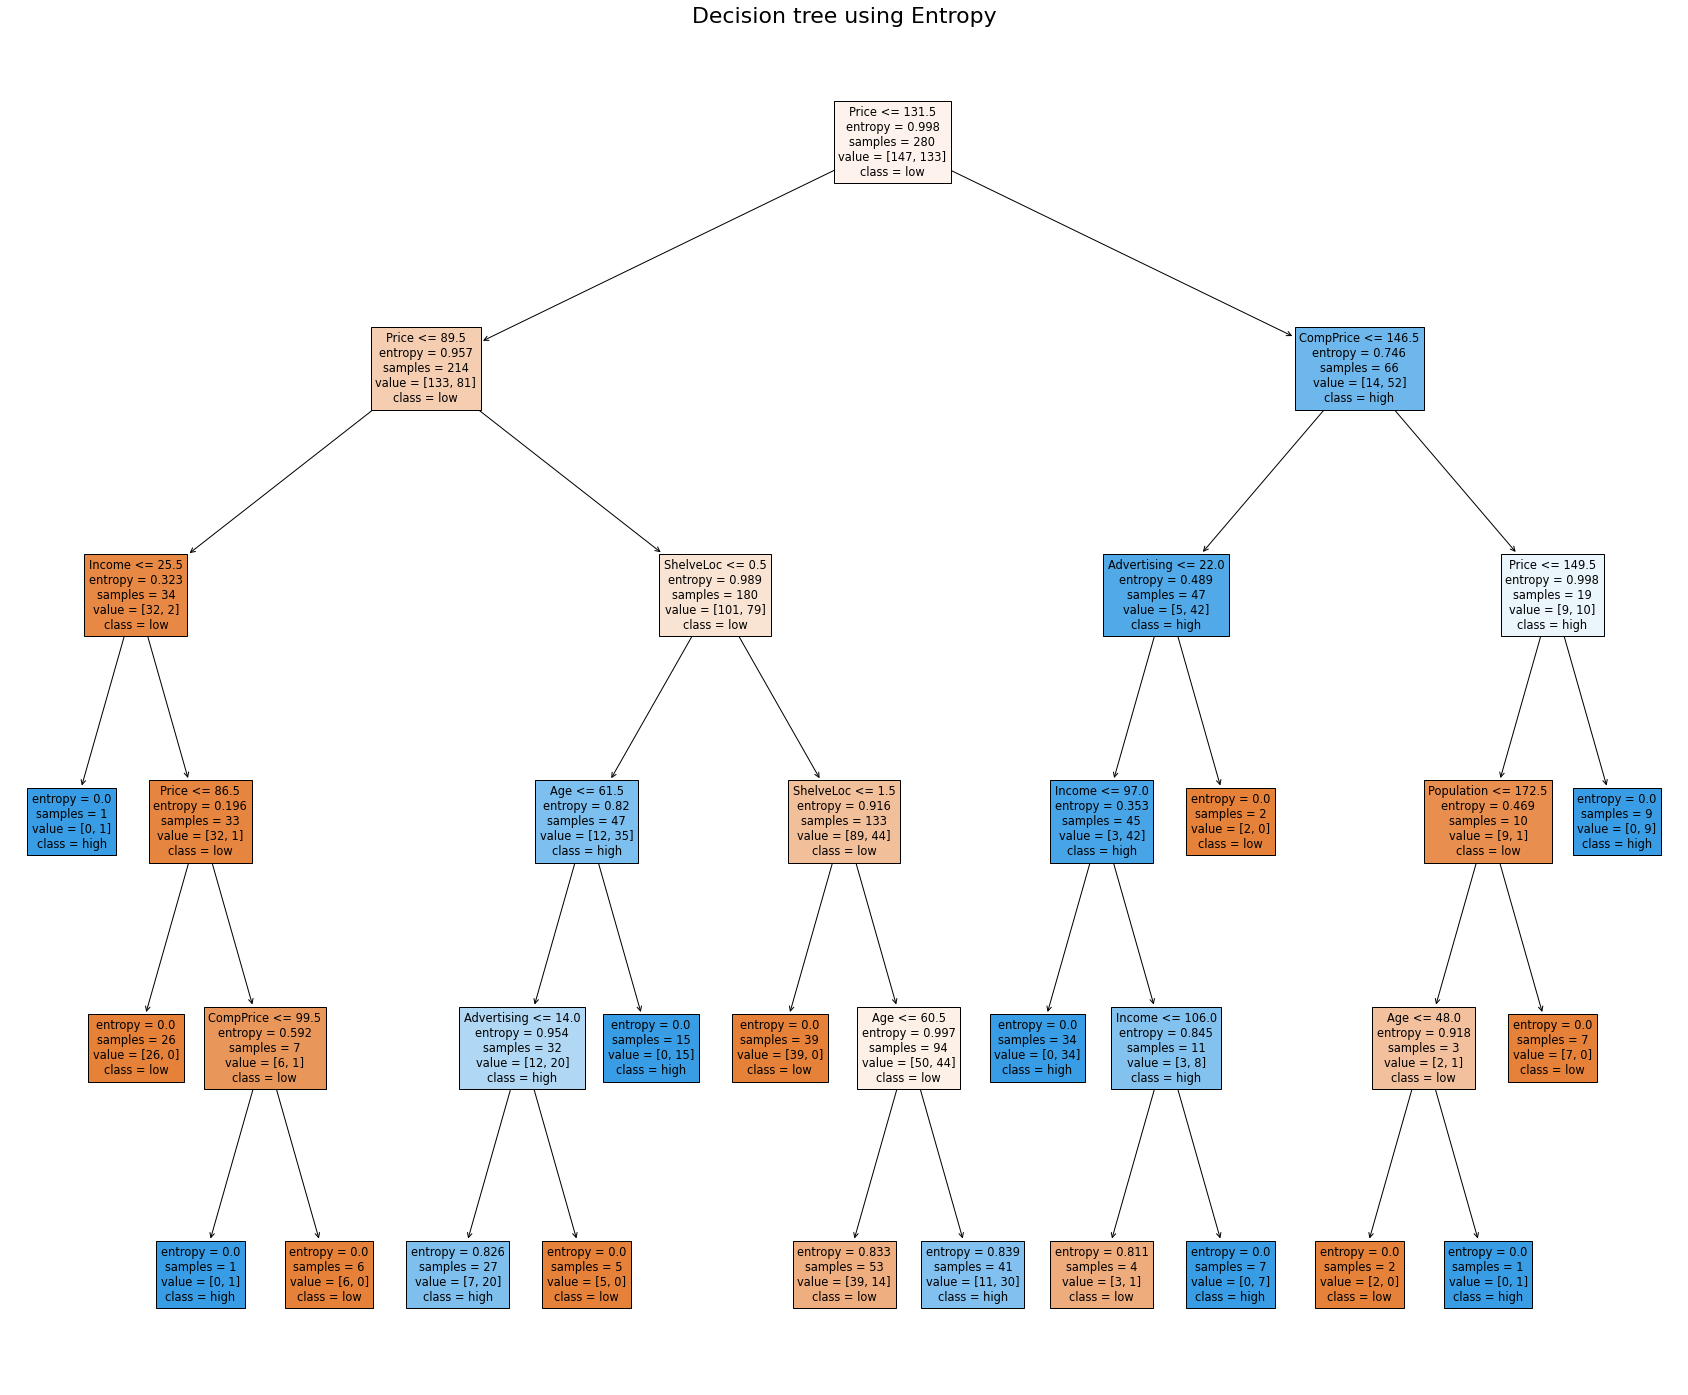

In [53]:
fig = plt.figure(figsize=(30,25))
fig = tree.plot_tree(model,
                     feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education', 
                                     'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)

# Building Decision Tree Classifier (CART) using Gini Criteria

In [54]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=5)

In [55]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [56]:
# Prediction and computing the accuracy
pred = model_gini.predict(x_test)
print('Accuracy is:',np.mean(preds == y_test))

Accuracy is: 0.6833333333333333


Text(0.5, 1.0, 'Decision tree using Gini Criteria')

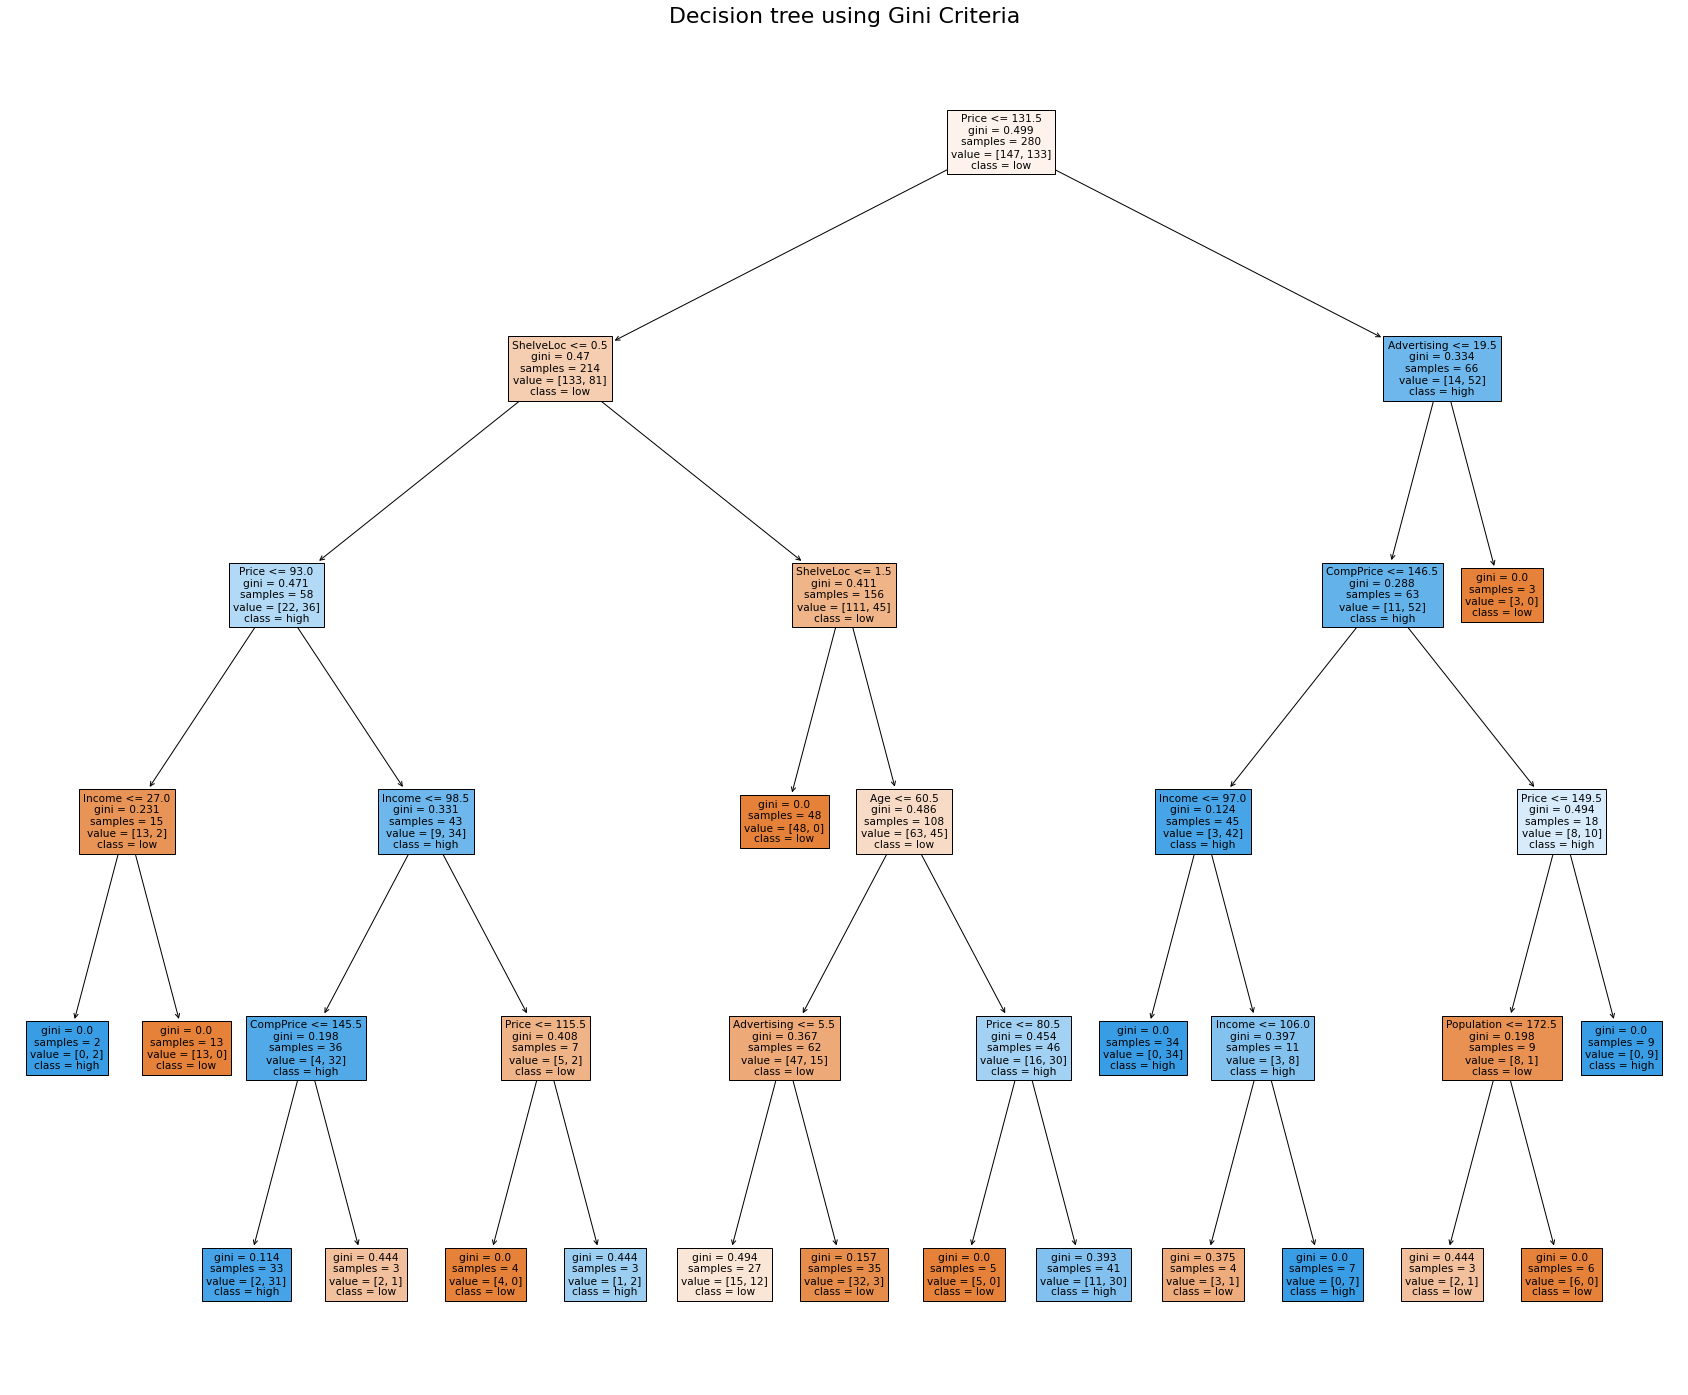

In [57]:
fig = plt.figure(figsize=(30,25))
fig = tree.plot_tree(model_gini,
                     feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education', 
                                     'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Gini Criteria',fontsize=22)

# Decision tree regression

In [58]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [59]:
array = company_d1.values
X = array[:,0:9]
Y = array[:,9]

In [60]:
X

array([[  9.5 , 138.  ,  73.  , ...,   0.  ,  42.  ,  17.  ],
       [ 11.22, 111.  ,  48.  , ...,   1.  ,  65.  ,  10.  ],
       [ 10.06, 113.  ,  35.  , ...,   2.  ,  59.  ,  12.  ],
       ...,
       [  7.41, 162.  ,  26.  , ...,   2.  ,  40.  ,  18.  ],
       [  5.94, 100.  ,  79.  , ...,   0.  ,  50.  ,  12.  ],
       [  9.71, 134.  ,  37.  , ...,   1.  ,  49.  ,  16.  ]])

In [61]:
# Urban column - Dependent Variable
Y

array([1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1.

In [62]:
# splitting data into training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state= 1)

In [63]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [64]:
print('Train data Accuracy is:',model.score(X_train, Y_train))

Train data Accuracy is: 1.0


In [65]:
print('Test data Accuracy is:',model.score(X_test, Y_test))

Test data Accuracy is: -1.2597826086956525
